# Aula 8 (25/11/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## Reamostragem espacial

---

Processo de adequar a resolução e outras características da imagem para que se possa trabalhar da melhor forma com ela

### Sub-amostragem:
Ir cortando alternadamente coluna e linha para reduzir a imagem

**Pento negativo**: há perda de informação

- Uma forma de reduzir a perda é realizar uma pré-filtragem na imagem antes de realizar a sub-amostragem, como forma de reduzir os pontos de alta intensidade.
- Normalmente é realizado o processamento de imagens em potências de 2, mas como pode-se trabalhar em reamostragens que fogem desse padrão?
  - É utilizado diferentes tipos de **interpolação**. Com isso, pode-se realizar aproximações de funções que representam a imagem final.

Interpolação:

> *A method of constructing new data points within the range of a discrete set of known data points.*

--- 

`cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst`

Opencv possui uma função chamada `resize` em que se pode escolher o tipo de interpolação que deseja usar. Eles são:

- INTER_NEAREST - a nearest-neighbor interpolation
- INTER_LINEAR - a bilinear interpolation (used by default)
- INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
- INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood
- INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood

Os flags de interpolação podem ser encontrados com os seguintes comandos:

`flags = [i for i in dir(cv2) if i.startswith('COLOR_')]`

`print(flags[0:20])`

Se tratando de aplicação, pode ser referido o seguinte;

> *Nearest neighbor will be as fast as possible, but you will lose substantial information when resizing.*
>
> *Linear interpolation is less fast, but will not result in information loss unless you're shrinking the image (which you are).*
>
> *Cubic interpolation (probably actually "Bicubic") uses one of many possible formulas that incorporate multiple neighbor pixels. This is much better for shrinking images, but you are still limited as to how much shrinking you can do without information loss. Depending on the algorithm, you can probably reduce your images by 50% or 75%. The primary con of this approach is that it is much slower.*


### Aliasing
Perda de informação de imagem que pode aparecer quando há amostragem de um sinal contínuo. No caso de uma imagem, a amostragem deve ser 2X maior que a máxima frequência da imagem para que não haja alising (Teorema de Nyquist).

--- 


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
img = cv2.imread('images\\fifa22.jpg') # tamanho da imagem original = 2000 x 2000

# Nearest neighbor interpolation
img_nearest = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_NEAREST)

# Bilinear interpolation
img_bilinear = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_LINEAR)

# Bicubic interpolation
img_bicubic = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_CUBIC)

# Resampling using pixel area relation. It may be a preferred method for image decimation, 
# as it gives moire'-free results. But when the image is zoomed, it is similar to the 
# INTER_NEAREST method.
img_area = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)

In [25]:
# Imshow para ver mais claramente as mudanças
'''
cv2.imshow('Original', img)
cv2.waitKey(0)
cv2.imshow('Nearest neighbor interpolation', img_nearest)
cv2.waitKey(0)
cv2.imshow('Bilinear interpolation', img_bilinear)
cv2.waitKey(0)
cv2.imshow('Bicubic interpolation', img_bicubic)
cv2.waitKey(0)
cv2.imshow('Area relation', img_area)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

"\ncv2.imshow('Original', img)\ncv2.waitKey(0)\ncv2.imshow('Nearest neighbor interpolation', img_nearest)\ncv2.waitKey(0)\ncv2.imshow('Bilinear interpolation', img_bilinear)\ncv2.waitKey(0)\ncv2.imshow('Bicubic interpolation', img_bicubic)\ncv2.waitKey(0)\ncv2.imshow('Area relation', img_area)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

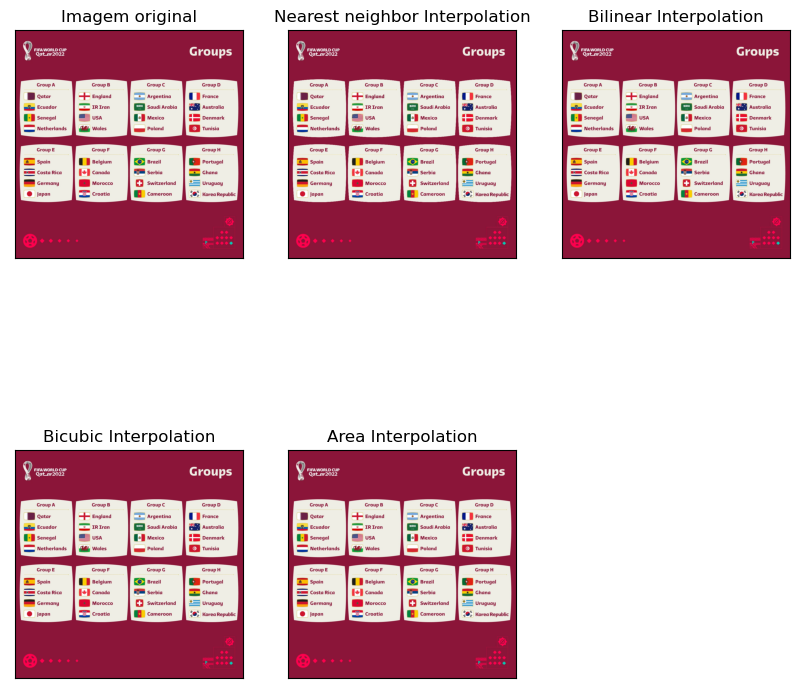

In [26]:
# Plotar todos os resultados
titles = ['Imagem original', 'Nearest neighbor Interpolation', 'Bilinear Interpolation', 'Bicubic Interpolation', 'Area Interpolation']
images = [img, img_nearest, img_bilinear, img_bicubic, img_area]
plt.figure(figsize=(10,10))
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Obs: Decimation is used to reduce the image resolution while maintaining the field of view. A typical application is having live view of the lower resolution image to reduce camera bandwidth and increase framerate. On the moment you want to capture the image you will disable decimation and you will capture the image with its full resolution.

## Representação e Descrição
Estudo das forma que são represetados os pixels que são pontos diferentes e os tipos de descrições que eles fazem parte.